<a href="https://colab.research.google.com/github/zeynepoykuerdem/SMSSpamDetection/blob/main/FinalTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N Gram Model

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score: 0.9704035874439462
Macro Recall: 0.9346714466352635
Macro Precision: 0.9371558735571145
Macro F1 Score: 0.9359084899695349


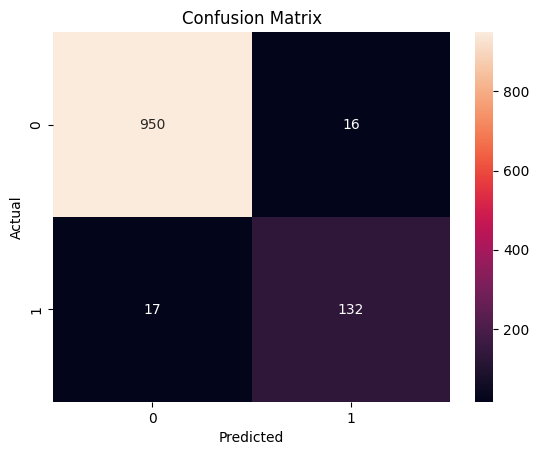

In [ ]:
!pip install scikit-learn
!pip install nltk

import nltk
from nltk import bigrams,trigrams
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet,stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, recall_score,precision_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

'''Dowloading the data'''
load_data=pd.read_csv('SMSSpamCollection',sep='\t', header=None, names=['label','message'])


'''Data Preprocessing
1) Tokenization = Breaking down the text into smaller units, each word is a token
2) Normalisation= Converting the words to lower case
3) Stop Words = Reducing noise and simply the data ("the", "is" or "in")
4) Lemmatization= Goes->go bats->bat

'''


lemmetizer=WordNetLemmatizer()

def lemmeatize_tokens(tokens):
    return [lemmetizer.lemmatize(token) for token in tokens]

def normalisation(tokens):
    return[token.lower() for token in tokens ]

def stopWords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]




def preprocessed_data(text):
  tokens=word_tokenize(text)
  tokens=normalisation(tokens)
  tokens=lemmeatize_tokens(tokens)
  tokens=stopWords(tokens)
  return tokens


load_data['tokens']=load_data['message'].apply(preprocessed_data)


load_data['tokens'].to_csv('tokens.csv',index=False)

#Identify Vocabulary, <s>, </s>, <u>


load_data['pseudo_tokens']=load_data['tokens'].apply(lambda x: ['<s>'] + x + ['</s>'])
load_data['pseudo_tokens'].to_csv('pseudo_tokens.csv',index=False)

X_tokens=load_data['pseudo_tokens']
y=load_data['label']
#defining vocabulary

train_tokens=[token for tokens in X_tokens for token in tokens]
vocabulary=set(train_tokens)
vocabulary.update(['<s>','</s>','<u>'])

def mark_unknown_words(tokens):
  return[token if token in vocabulary else '<u>' for token in tokens]

X_tokens=X_tokens.apply(mark_unknown_words)
X_text = X_tokens.apply(lambda x: ' '.join(x))





#Feature Extraction
vectorizer=CountVectorizer(ngram_range=(2,2))
X_vectorized=vectorizer.fit_transform(X_text)
matrix=pd.DataFrame(data=X_vectorized.toarray(),columns=vectorizer.get_feature_names_out())
matrix.to_csv('matrix.csv',index=False)


# Seperating train set into ham and spam set

X_train, X_test, y_train, y_test = train_test_split(X_tokens, y, test_size=0.2, random_state=42)

X_train_ham=X_train[y_train=='ham']
X_train_spam=X_train[y_train=='spam']






# the number of occurences of bigram in a corpus --> matrixle bul
# the number of occurences of the word in corpus --> matrixle bul
# the number of words in vocab

vocab_size=len(vocabulary)


bigram_counts_ham = Counter([bigram for tokens in X_train_ham for bigram in bigrams(tokens)])
unigram_counts_ham = Counter([token for tokens in X_train_ham for token in tokens])


bigram_counts_spam = Counter([bigram for tokens in X_train_spam for bigram in bigrams(tokens)])
unigram_counts_spam = Counter([token for tokens in X_train_spam for token in tokens])



def calculate_log_probability(message, bigram_number, numberOfOcofWord,vocab_size,k=0.5):
  bigrams_list=list(bigrams(message))

  log_prob=0

  for w1,w2 in bigrams_list:
    bigram_count=bigram_number.get((w1,w2),0)
    word_count=numberOfOcofWord.get(w1,0)
    bigram_prob=(bigram_count+k)/(word_count+k*vocab_size)
    log_prob+=math.log(bigram_prob)


  return log_prob



predicted_labels=[]

for message in X_test:
  log_p_ham= calculate_log_probability(message,bigram_counts_ham,unigram_counts_ham,vocab_size)
  log_p_spam= calculate_log_probability(message,bigram_counts_spam,unigram_counts_spam,vocab_size)

  if log_p_ham>log_p_spam:
    predicted_labels.append("ham")
  else:
    predicted_labels.append("spam")


accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", accuracy)

macro_recall= recall_score(y_test, predicted_labels, average='macro')
print("Macro Recall:", macro_recall)

macro_precision= precision_score(y_test, predicted_labels, average='macro')
print("Macro Precision:", macro_precision)

macro_f1= f1_score(y_test, predicted_labels, average='macro')
print("Macro F1 Score:", macro_f1)


sns.heatmap(confusion_matrix(y_test, predicted_labels), annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score: 0.9811659192825112
Macro Recall: 0.9295302013422819
Macro Precision: 0.9893617021276595
Macro F1 Score: 0.956717518729863


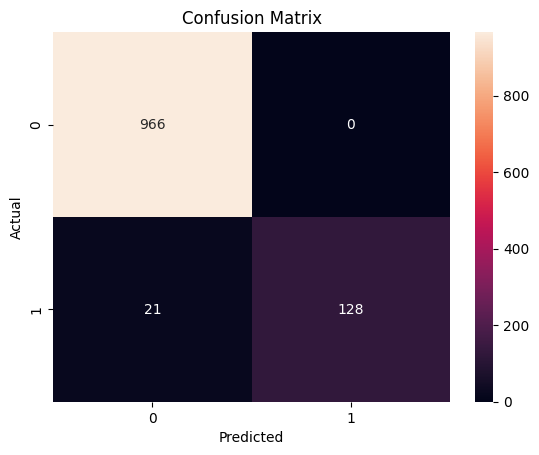

In [ ]:

import nltk
from nltk import bigrams,trigrams
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet,stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

'''Dowloading the data'''
load_data=pd.read_csv('SMSSpamCollection',sep='\t', header=None, names=['label','message'])


'''Data Preprocessing
1) Tokenization = Breaking down the text into smaller units, each word is a token
2) Normalisation= Converting the words to lower case
3) Stop Words = Reducing noise and simply the data ("the", "is" or "in")
4) Lemmatization= Goes->go bats->bat

'''


lemmetizer=WordNetLemmatizer()

def lemmeatize_tokens(tokens):
    return [lemmetizer.lemmatize(token) for token in tokens]

def normalisation(tokens):
    return[token.lower() for token in tokens ]

def stopWords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]




def preprocessed_data(text):
  tokens=word_tokenize(text)
  tokens=normalisation(tokens)
  tokens=lemmeatize_tokens(tokens)
  tokens=stopWords(tokens)
  return tokens

load_data['tokens']=load_data['message'].apply(preprocessed_data)
load_data['processed_data']=load_data['tokens'].apply(lambda tokens: ' '.join(tokens))

X=load_data['processed_data']
y=load_data['label']


vectorizer=CountVectorizer(ngram_range=(2,2))
X_vectorized=vectorizer.fit_transform(X)

matrix_random=pd.DataFrame(data=X_vectorized.toarray(),columns=vectorizer.get_feature_names_out())
matrix_random.to_csv('matrix_random.csv',index=False)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

random_forest=RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=100, min_samples_split=2 )
random_forest.fit(X_train,y_train)

predicted_labels=random_forest.predict(X_test)

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", accuracy)

macro_recall= recall_score(y_test, predicted_labels, average='macro')
print("Macro Recall:", macro_recall)

macro_precision= precision_score(y_test, predicted_labels, average='macro')
print("Macro Precision:", macro_precision)

macro_f1= f1_score(y_test, predicted_labels, average='macro')
print("Macro F1 Score:", macro_f1)


sns.heatmap(confusion_matrix(y_test, predicted_labels), annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()











